# Causal Inference Part 2
 In this step I  make a dta extraction based on some model and comapre them also in order to find the best one .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
df_clean = pd.read_csv("../data/df_clean.csv")

In [26]:
X = df_clean.iloc[:,2:].values

y = df_clean.iloc[:, 1:2].values

### Encoding Dependent Variable with Label Encoder

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

### Split the data into training set and test set

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
#Standardizing training data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [13]:
X_train

array([[ 1.0449852 ,  0.29708512,  1.01044815, ...,  1.21839781,
         0.29811854,  0.08380738],
       [ 1.68141074, -1.14098169,  1.70338066, ...,  0.69716372,
        -0.88595033, -0.41234747],
       [-1.44260855, -1.12732916, -1.4504636 , ..., -1.52233766,
         0.1807324 , -0.33657109],
       ...,
       [ 0.82638686,  1.17539807,  0.86625411, ...,  1.10638475,
         0.72853438,  3.02284824],
       [-0.05077356,  0.43133503, -0.11146165, ..., -0.54050588,
        -1.1207226 , -0.44903285],
       [-0.32748032, -0.21260945, -0.39904866, ..., -0.98109057,
        -1.52732096, -1.31985978]])

### Training Models 

In [49]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)

    elif predictor == 'knn':
        print('TrainingK-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)

    elif predictor == 'dt':
        print('Training LDecision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)

    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)
        
    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)


    classifier.fit(X_train, y_train)

    print('''Predicting Single Cell Result''')
    single_predict = classifier.predict(sc.transform([[
        17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419,
        0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587,
        0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189
    ]])) 
    if single_predict > 0.5 :
        print("Cancer is Malignant \n")
    else :
        print("Cancer is Benign \n")

    print('''Prediciting Test Set Result''')
    y_pred = classifier.predict(X_test)
    result = np.concatenate((y_pred.reshape(len(y_pred), 1),
                             y_test.reshape(len(y_test), 1)), 1)
    print(result,'\n')
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm,'\n')
    print('True Positives :',cm[0][0])
    print('False Positives :',cm[0][1])
    print('False Negatives :',cm[1][0])
    print('True Negatives :', cm[0][1],'\n')

    print('''Classification Report''')
    print(classification_report(y_test, y_pred,
          target_names=['M', 'B'], zero_division=1))

    print('''Evaluating Model Performance''')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy,'\n')

    print('''Applying K-Fold Cross validation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100),'\n') 

### Training Decision Trees

### Decision tree

In [50]:
predictor('dt', {'criterion': 'gini', 'max_features': 'auto', 'splitter': 'random' ,'random_state': 0})

Training LDecision Tree Classifier on Training Set
Predicting Single Cell Result
Cancer is Benign 

Prediciting Test Set Result
[[1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[70  2]
 [ 6 36]] 

True Positives : 70
False 

### Random forest model 

In [51]:
predictor('rfc', {'criterion': 'entropy',
          'max_features': 'auto', 'n_estimators': 250,'random_state': 0})

Training Random Forest Classifier on Training Set
Predicting Single Cell Result
Cancer is Malignant 

Prediciting Test Set Result
[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]] 

Making Confusion Matrix
[[72  0]
 [ 5 37]] 

True Positives : 72
Fals

In [57]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=0) with an accuracy of  96.06


## Let's know used random forest model

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score



In [31]:
# y includes our labels and x includes our features
y = df_clean.diagnosis                          # M or B 
list = ['id','diagnosis']
x = df_clean.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [40]:
from sklearn.model_selection import train_test_split


# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Number of features 

In [83]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=4,scoring='accuracy')  
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 9


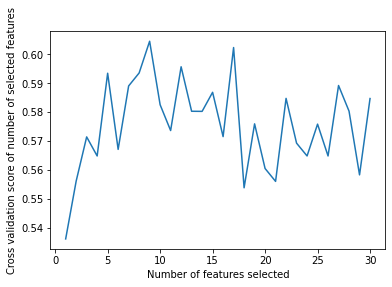

In [84]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


### Feature importance :

Feature ranking:
1. feature 28 (0.051159)
2. feature 18 (0.043661)
3. feature 19 (0.038520)
4. feature 11 (0.038051)
5. feature 7 (0.037625)
6. feature 25 (0.036289)
7. feature 15 (0.036181)
8. feature 4 (0.036000)
9. feature 14 (0.035638)
10. feature 24 (0.035356)
11. feature 17 (0.035081)
12. feature 12 (0.034749)
13. feature 21 (0.034241)
14. feature 10 (0.032727)
15. feature 8 (0.032370)
16. feature 5 (0.032214)
17. feature 1 (0.032119)
18. feature 27 (0.031775)
19. feature 13 (0.031632)
20. feature 29 (0.031373)
21. feature 9 (0.031090)
22. feature 16 (0.029808)
23. feature 26 (0.029533)
24. feature 6 (0.029480)
25. feature 3 (0.029126)
26. feature 22 (0.028605)
27. feature 20 (0.027467)
28. feature 23 (0.027061)
29. feature 2 (0.026126)
30. feature 0 (0.024942)


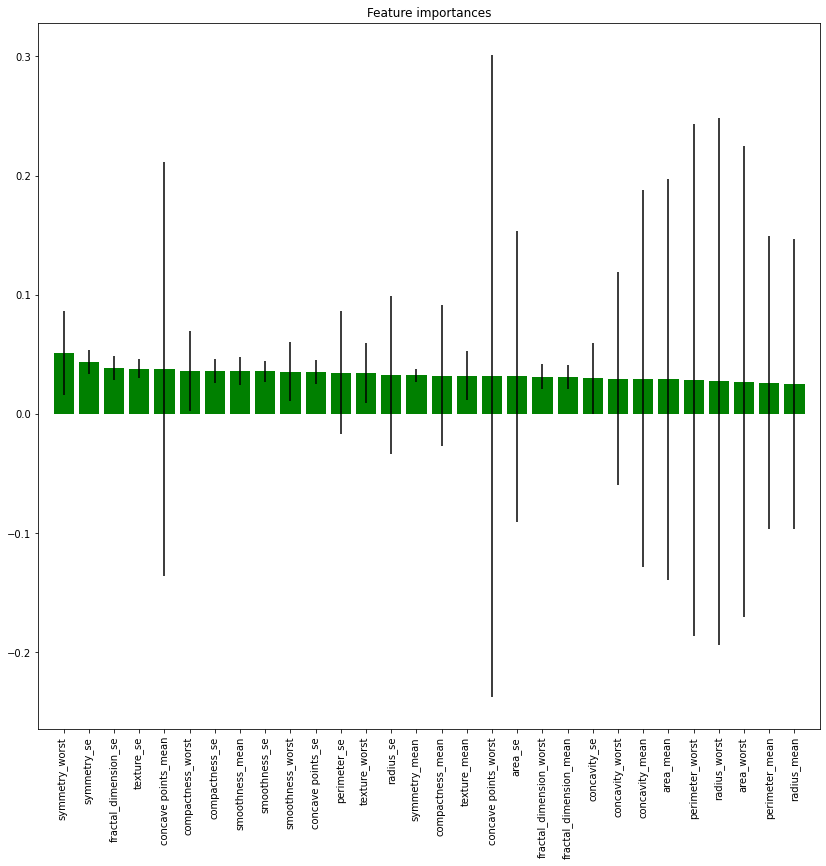

In [85]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

 That is the 9 features selected using the Random forest Algorythm  : 
 ## 'concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se'

That is the features with high correlation getting on the heatmap: 
### 'diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',  'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst','concave points_worst' \
We can notice that most of te features selected are containing already on the features with high corelation  except
###  'smoothness_worst', 'smoothness_se', 'symmetry_se' and 'concave points_se'
But suitable for the prediction.

## Build CSV file for features extracted

In [6]:

from sklearn.preprocessing import LabelEncoder
#encode diagnosis column  ( Malignant = 1 and Benign = 0 )
label_1 = LabelEncoder()
df_clean['diagnosis'] = label_1.fit_transform(df_clean['diagnosis'])
df_clean.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Selected features

In [9]:
df_clean1=df_clean[['diagnosis','concave points_worst', 'concave points_se', 'symmetry_se', 'radius_se', 'concavity_mean', 'smoothness_worst', 'smoothness_se', 'area_mean', 'area_se']]
df_clean1

,diagnosis,concave points_worst,concave points_se,symmetry_se,radius_se,concavity_mean,smoothness_worst,smoothness_se,area_mean,area_se
0,1,0.2654,0.01587,0.03003,1.0950,0.30010,0.16220,0.006399,1001.0,153.40
1,1,0.1860,0.01340,0.01389,0.5435,0.08690,0.12380,0.005225,1326.0,74.08
2,1,0.2430,0.02058,0.02250,0.7456,0.19740,0.14440,0.006150,1203.0,94.03
3,1,0.2575,0.01867,0.05963,0.4956,0.24140,0.20980,0.009110,386.1,27.23
4,1,0.1625,0.01885,0.01756,0.7572,0.19800,0.13740,0.011490,1297.0,94.44
...,...,...,...,...,...,...,...,...,...,...
564,1,0.2216,0.02454,0.01114,1.1760,0.24390,0.14100,0.010300,1479.0,158.70
565,1,0.1628,0.01678,0.01898,0.7655,0.14400,0.11660,0.005769,1261.0,99.04
566,1,0.1418,0.01557,0.01318,0.4564,0.09251,0.11390,0.005903,858.1,48.55
567,1,0.2650,0.01664,0.02324,0.7260,0.35140,0.16500,0.006522,1265.0,86.22


In [12]:
df_clean1.to_csv("../data/df_causal.csv",index=False)